In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%cd /content/drive/MyDrive/Soft_Computing_Project/

/content/drive/MyDrive/Soft_Computing_Project


In [25]:
#Begin with importing the packages abd libraries required for the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
seed = 12
np.random.seed(seed)


In [28]:
import operator
import scipy.io.wavfile as wav
import os
import pickle
import random

In [29]:
#importing packages for modeling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2, InceptionV3, VGG19
from tensorflow.keras.optimizers import Adam

# Exploratory Data Analysis

The dataset has the following folders:

> Genres original — A collection of 10 genres with 100 audio files each, all having a length of 30 seconds.

> Images original — A visual representation for each audio file. The images shows the pictorial representation of the audio files using its Mel-spectrogram. Classifying data is through neural networks because NN’s usually take in some sort of image representation.

> 2 CSV files — Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs are split before into 3 seconds audio files.

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Soft_Computing_Project/Data/features_3_sec.csv")

In [32]:
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [ ]:
print("Dataset has",df.shape)
print("Count of different samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of different samples


,index,label
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


**Librosa:**

Librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems. By using Librosa, we can extract certain key features from the audio samples such as Tempo, Chroma Energy Normalized, Mel-Freqency Cepstral Coefficients, Spectral Centroid, Spectral Contrast, Spectral Rolloff, and Zero Crossing Rate.

> librosa.load returns two things: 
* The sample rate sr: which means how many samples are recorded per second.
*A 2D array:
    
    1) The first axis: represents the recorded samples of amplitudes (change of air pressure) in the audio.

    2) The second axis: represents the number of channels in the audio.

In [ ]:
audio_fp = '/content/drive/MyDrive/Soft_Computing_Project/Data/genres_original/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [ ]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)

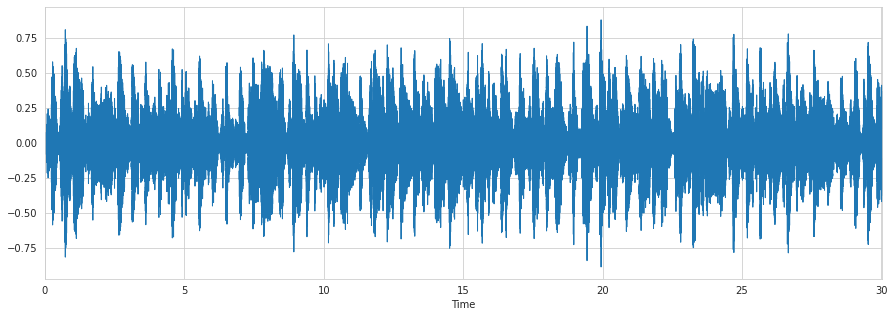

In [ ]:
# plot sample file
plt.figure(figsize=(15,5))
lplt.waveplot(audio_data)
plt.show()

(20, 1293)


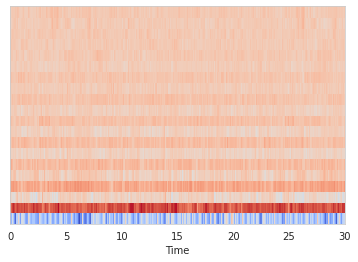

In [ ]:
mfccs = librosa.feature.mfcc(audio_data, sr=sr)
print (mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
df.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

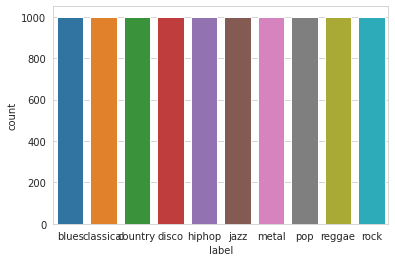

In [ ]:
import seaborn as sns
sns.countplot(x="label", data=df)

**Initial findings:**

> Only 1000 songs are in the dataset with no null values
length is not a relevant variable which needs to be dropped in model training phase.

> The data are sorted in the same order as the songs in the folders of the dataset and the classes are balanced.

> There are some other music features that this dataset did not extract, for example, spectral contrast, spectral flatness, tonal centroid features etc. 


### Feature Extraction

Preprocessing of data is required before we finally train the data. We will try and focus on the last column that is ‘label’ and will encode it.

In [33]:
df = df.drop( labels='filename' , axis=1)


### Encode Genre Label

In [34]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)


{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [35]:
# update labels in df to index
df.label = [label_index[l] for l in df.label]

In [36]:
corr = df.corr()

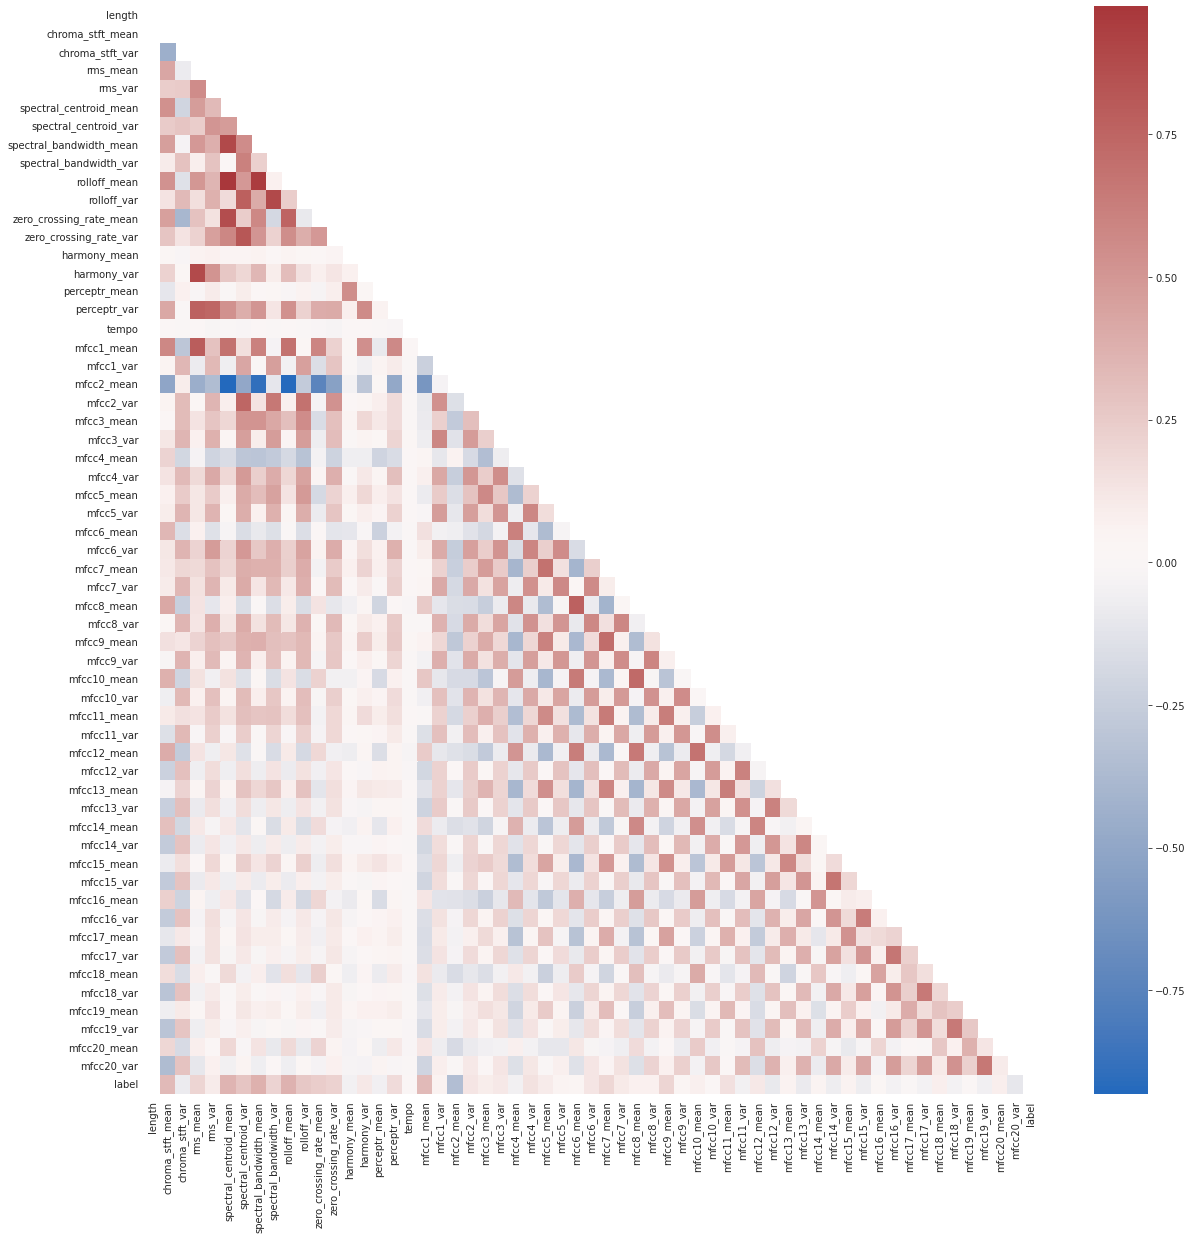

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask,cmap="vlag")

Most of the variables do not have a high correlation with other variables. Let's filter out the extremely highly correlated pairs and examine them.

In [ ]:
# This correlation of different features with the label column
corr_matrix = df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                      1.000000
spectral_bandwidth_mean    0.376621
rolloff_mean               0.369515
spectral_centroid_mean     0.360175
chroma_stft_mean           0.330370
mfcc1_mean                 0.326771
spectral_centroid_var      0.281352
rolloff_var                0.260298
zero_crossing_rate_mean    0.243590
zero_crossing_rate_var     0.215464
spectral_bandwidth_var     0.210972
mfcc9_mean                 0.207059
rms_mean                   0.205471
mfcc7_mean                 0.198996
perceptr_var               0.170666
mfcc11_mean                0.152093
mfcc4_var                  0.144013
mfcc6_var                  0.131331
mfcc2_var                  0.127176
harmony_var                0.115452
mfcc12_mean                0.111270
mfcc3_var                  0.110916
mfcc7_var                  0.107591
rms_var                    0.101467
mfcc5_mean                 0.100811
mfcc3_mean                 0.089573
mfcc20_mean                0.083224
mfcc18_mean                0

None of the attributes show higher correlation with the label directly, hence seeing the correlation among the themselves

In [ ]:
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))  #Upper triangle of an array. np.triu
                  .stack()
                  .sort_values(ascending=False))
for index, value in sol.items():
    if (value > 0.75) or (value < -0.75):
        print(index, value)

('spectral_centroid_mean', 'rolloff_mean') 0.9743599625424456
('spectral_bandwidth_mean', 'rolloff_mean') 0.9510001983017659
('spectral_bandwidth_var', 'rolloff_var') 0.8913391590779084
('spectral_centroid_mean', 'spectral_bandwidth_mean') 0.8903820862571323
('rms_mean', 'harmony_var') 0.884846237548459
('spectral_centroid_mean', 'zero_crossing_rate_mean') 0.8654866435613542
('spectral_centroid_var', 'zero_crossing_rate_var') 0.8183483105102959
('rms_mean', 'mfcc1_mean') 0.794999665492006
('spectral_centroid_var', 'rolloff_var') 0.7803079607634968
('mfcc6_mean', 'mfcc8_mean') 0.769247654326919
('rms_mean', 'perceptr_var') 0.7664460670833382
('rolloff_mean', 'zero_crossing_rate_mean') 0.7554419563187756
('spectral_bandwidth_mean', 'mfcc2_mean') -0.8871556361374672
('rolloff_mean', 'mfcc2_mean') -0.9236517584142938
('spectral_centroid_mean', 'mfcc2_mean') -0.9314352888991394


### Dividing Data Into Training and Testing Sets

In [37]:
y = df.label
X = df.iloc[:, 0:59]


#Use `label` to split data evenly and drop `label` column after split
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.1, stratify=df.label, random_state=77)
X_train.drop('label',axis=1,inplace=True)
X_test.drop('label',axis=1,inplace=True)

In [38]:
index_ = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


# MODELLING

# 1. Artificial Neural Networks

> What is a neural network?

        Neural networks form the base of deep learning, where the algorithms are inspired by the structure of the human brain. Neural networks take in data and train themselves to recognize the patterns in this data and then predict the outputs for a new set of similar data. Neural networks are made up of layers of neurons which form the core processing units of the network.First we have a layer which receives input and the output layer for predicting final output. And in between exist the hidden layers which perform most of the computations.
      
  > How is a neural network trained?
  
      In the training process along with the input our network also has the output fed. Predicted output is compared against the actual output to realize the error in prediction. The magnitude of the error indicates the value of difference from actual output and the sign suggests if our predicted values are higher or lower than expected. To Reduce the error this information is then transferred backward through our network which is known as back propagation. Now based on the information the weights are adjusted in multiple cycles of forward propagation and backward propagation iteratively. These cycles performed with multiple inputs in the process continues until our weights are assigned such that the network can predict correctly.

In [ ]:
from keras.models import Sequential
#from keras. wrappers. scikit_learn import KerasClassifier
def trainModel(model, epochs, optimizer):
  batch_size = 128
  model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model. fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,batch_size=batch_size)


In [ ]:
def plotValidate(history):
  print ("Validation Accuracy" , max(history. history["val_accuracy"]) )
  pd. DataFrame (history. history) . plot(figsize=(12,6) )
  plt.show()

In [ ]:
import keras as k

In [ ]:
model = k.models.Sequential([
k.layers.Dense(512, activation='relu', input_shape=(X_train. shape [1],)),
k.layers.Dropout(0.2),
k.layers.Dense(256, activation='relu' ),
k.layers.Dropout (0.2),
k.layers.Dense(128, activation='relu'),
k.layers.Dropout (0.2),
k.layers.Dense(64, activation='relu'),
k.layers.Dropout (0.2),
k. layers.Dense(10, activation='softmax' ),])



In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
model_history = trainModel(model=model, epochs=600, optimizer='adam' )


Epoch 1/600
6/6 [==============================] - 3s 107ms/step - loss: 2.2088 - accuracy: 0.2030 - val_loss: 2.0019 - val_accuracy: 0.3515
Epoch 2/600
6/6 [==============================] - 0s 26ms/step - loss: 1.9018 - accuracy: 0.3448 - val_loss: 1.7715 - val_accuracy: 0.4000
Epoch 3/600
6/6 [==============================] - 0s 23ms/step - loss: 1.6954 - accuracy: 0.4373 - val_loss: 1.5423 - val_accuracy: 0.4242
Epoch 4/600
6/6 [==============================] - 0s 24ms/step - loss: 1.4718 - accuracy: 0.4776 - val_loss: 1.3751 - val_accuracy: 0.5121
Epoch 5/600
6/6 [==============================] - 0s 22ms/step - loss: 1.3410 - accuracy: 0.5388 - val_loss: 1.2626 - val_accuracy: 0.5182
Epoch 6/600
6/6 [==============================] - 0s 26ms/step - loss: 1.2484 - accuracy: 0.5881 - val_loss: 1.1336 - val_accuracy: 0.5697
Epoch 7/600
6/6 [==============================] - 0s 15ms/step - loss: 1.1606 - accuracy: 0.5642 - val_loss: 1.0583 - val_accuracy: 0.6303
Epoch 8/600
6/6 [==

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print ("The test Loss is :", test_loss)
print("\nThe Best Accuracy is :", test_acc*100)



3/3 [==============================] - 0s 9ms/step - loss: 2.1278 - accuracy: 0.7212
The test Loss is : 2.1278128623962402

The Best Accuracy is : 72.12121486663818


### Model  2

In [ ]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# remove irrelevant columns
df_shuffle.drop(['length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [ ]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

10.01001001001001
10.010111223458038
10.009813542688912


In [ ]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [ ]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
model_2 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=500, optimizer='rmsprop')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              59392     
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

Max. Validation Accuracy 0.9398382306098938


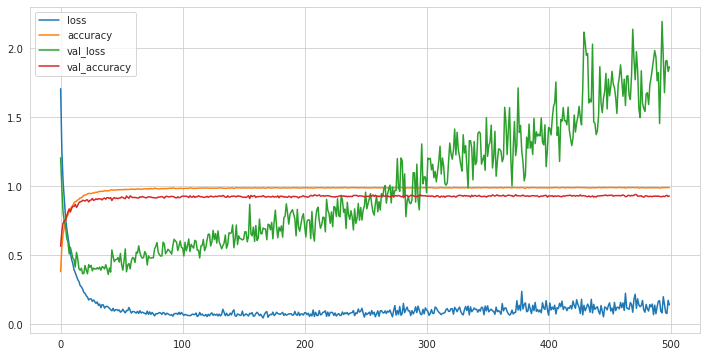

In [ ]:
plotHistory(model_2_history)

In [ ]:
test_loss, test_acc  = model_2.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

8/8 [==============================] - 0s 6ms/step - loss: 1.8933 - accuracy: 0.9274
The test Loss is : 1.8933086395263672

The Best test Accuracy is : 92.73797869682312


# 2. Convolution Neural Networks

In [13]:
BATCH_SIZE=8
TARGET_SIZE=224 # Based on EfficientNetB0
NUM_CLASSES=10

In [14]:
IMG = '/content/drive/MyDrive/Soft_Computing_Project/Data/images_original'

In [15]:
train_ds = image_dataset_from_directory(
  IMG,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 800 files for training.


In [16]:
val_ds = image_dataset_from_directory(
  IMG,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(TARGET_SIZE, TARGET_SIZE),
  batch_size=BATCH_SIZE)

Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


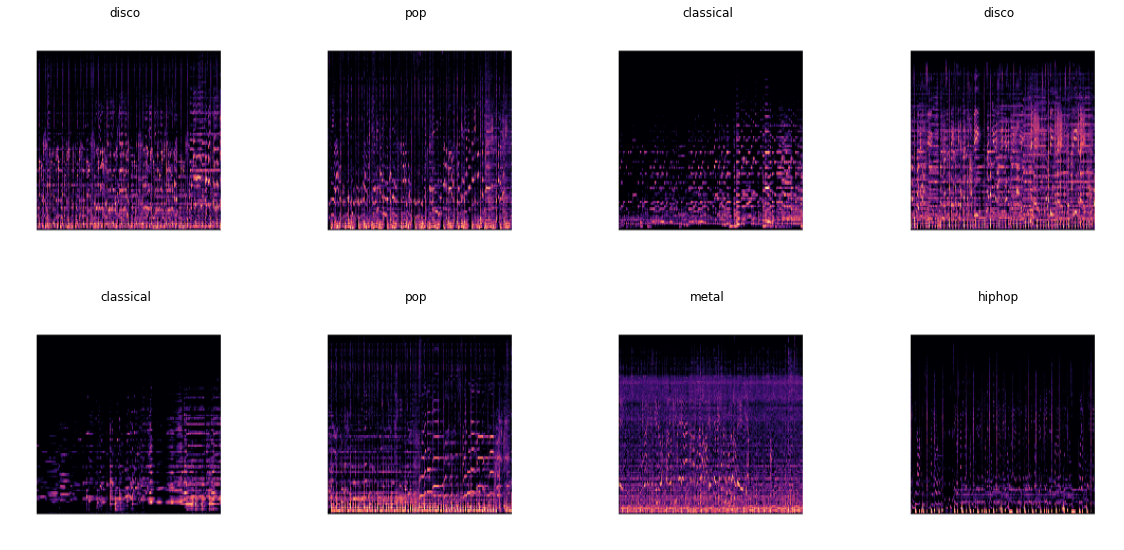

In [24]:
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
model_save = tf.keras.callbacks.ModelCheckpoint('./best_weights.h5', 
                             save_best_only = True, 
                             save_weights_only = True,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'min', verbose = 1)

In [ ]:
def plot_hist(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 64)       

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30

Epoch 1: val_loss improved from inf to 2.04082, saving model to ./best_weights.h5
100/100 - 13s - loss: 2.2732 - accuracy: 0.1625 - val_loss: 2.0408 - val_accuracy: 0.2462 - lr: 0.0010 - 13s/epoch - 129ms/step
Epoch 2/30

Epoch 2: val_loss improved from 2.04082 to 1.73094, saving model to ./best_weights.h5
100/100 - 10s - loss: 1.8362 - accuracy: 0.3462 - val_loss: 1.7309 - val_accuracy: 0.4472 - lr: 0.0010 - 10s/epoch - 99ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.73094
100/100 - 17s - loss: 1.4583 - accuracy: 0.4963 - val_loss: 1.7879 - val_accuracy: 0.3367 - lr: 0.0010 - 17s/epoch - 172ms/step
Epoch 4/30

Epoch 4: val_loss improved from 1.73094 to 1.36330, saving model to ./best_weights.h5
100/100 - 8s - loss: 1.0279 - accuracy: 0.6463 - val_loss: 1.3633 - val_accuracy: 0.5226 - lr: 0.0010 - 8s/epoch - 85ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.36330
100/100 - 8s - loss: 0.7047 - accuracy: 0.7525 - val_loss: 1.5650 - val_accuracy: 0.

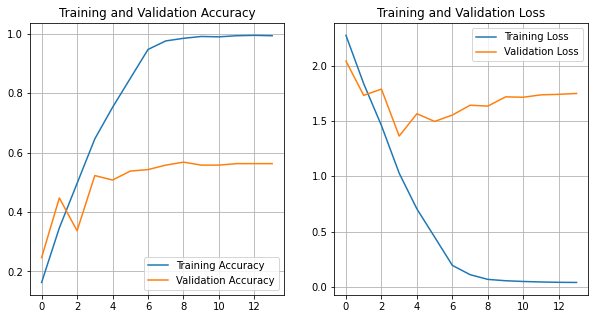

In [ ]:
plot_hist(history)

In [ ]:
# Save the model
model.save('custom_cnn_1.h5')

# 3. Transfer Learning

In [ ]:
def tranfer_learning_create_model(conv_base):
    
    # Freeze pre-trained layers
    conv_base.trainable = False
    
    # Re-build top layers
    model = conv_base.output
    model = layers.GlobalAveragePooling2D()(model)
    model = layers.BatchNormalization()(model)
    
    dropout_rate=0.2
    model = layers.Dropout(dropout_rate, name="top_dropout")(model)
    model = layers.Dense(NUM_CLASSES, activation = "softmax")(model)
    model = models.Model(conv_base.input, model)

    model.compile(optimizer = Adam(learning_rate = 0.01),
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])
    return model

VGG19

In [ ]:
conv_base = VGG19(include_top = False, weights = "imagenet",
                               input_shape = (TARGET_SIZE, TARGET_SIZE, 3))
model_vgg = tranfer_learning_create_model(conv_base)
model_vgg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
epochs = 30
history_vgg = model_vgg.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30

Epoch 1: val_loss did not improve from 1.30035
100/100 - 26s - loss: 1.9434 - accuracy: 0.4313 - val_loss: 1.7864 - val_accuracy: 0.4975 - lr: 0.0100 - 26s/epoch - 264ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.30035
100/100 - 20s - loss: 1.1740 - accuracy: 0.6500 - val_loss: 1.8047 - val_accuracy: 0.4975 - lr: 0.0100 - 20s/epoch - 199ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.30035

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
100/100 - 20s - loss: 1.0761 - accuracy: 0.6637 - val_loss: 1.8210 - val_accuracy: 0.5075 - lr: 0.0100 - 20s/epoch - 198ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.30035
100/100 - 21s - loss: 0.7199 - accuracy: 0.7638 - val_loss: 1.6524 - val_accuracy: 0.5678 - lr: 0.0030 - 21s/epoch - 209ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.30035
100/100 - 19s - loss: 0.5875 - accuracy: 0.8000 - val_loss: 1.8327 - val_accuracy: 0.5427 - lr: 0.0030 - 19s/epoch -

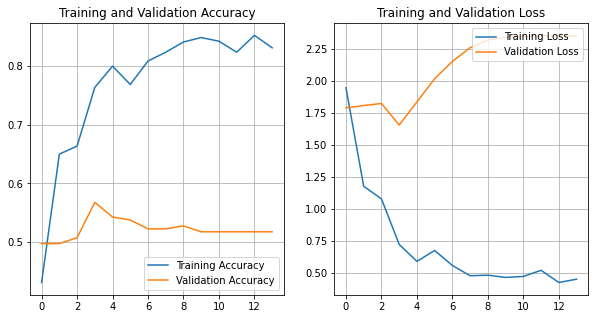

In [ ]:
plot_hist(history_vgg)

EfficientNetB0

In [ ]:
conv_base = EfficientNetB0(include_top = False, weights = "imagenet", drop_connect_rate=0.6,
                               input_shape = (TARGET_SIZE, TARGET_SIZE, 3))
model_effb0 = tranfer_learning_create_model(conv_base)

model_effb0.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
epochs = 30
history_effb0 = model_effb0.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30

Epoch 1: val_loss did not improve from 1.30035
100/100 - 17s - loss: 3.6968 - accuracy: 0.3487 - val_loss: 1.6184 - val_accuracy: 0.4372 - lr: 0.0100 - 17s/epoch - 165ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.30035
100/100 - 7s - loss: 2.8475 - accuracy: 0.4737 - val_loss: 1.5262 - val_accuracy: 0.5126 - lr: 0.0100 - 7s/epoch - 66ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.30035
100/100 - 7s - loss: 2.4913 - accuracy: 0.5362 - val_loss: 1.8643 - val_accuracy: 0.5176 - lr: 0.0100 - 7s/epoch - 65ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.30035

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
100/100 - 8s - loss: 2.5401 - accuracy: 0.5325 - val_loss: 1.8120 - val_accuracy: 0.5126 - lr: 0.0100 - 8s/epoch - 82ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.30035
100/100 - 7s - loss: 1.8006 - accuracy: 0.5925 - val_loss: 1.5981 - val_accuracy: 0.6131 - lr: 0.0030 - 7s/epoch - 65ms/step


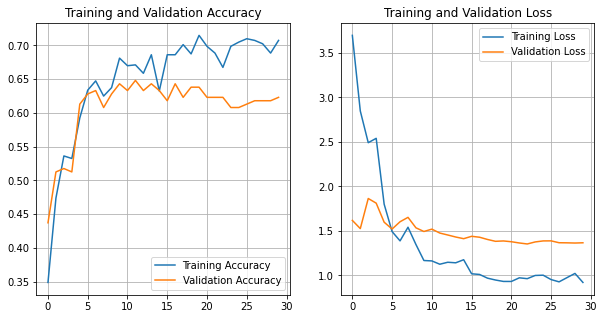

In [ ]:
plot_hist(history_effb0)

MobileNetV2

In [ ]:
conv_base = MobileNetV2(include_top = False, weights = "imagenet", 
                               input_shape = (TARGET_SIZE, TARGET_SIZE, 3))
model_mobnet = tranfer_learning_create_model(conv_base)
model_mobnet.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                             

In [ ]:
epochs = 30
history_mobnet = model_mobnet.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30

Epoch 1: val_loss did not improve from 1.30035
100/100 - 11s - loss: 3.2982 - accuracy: 0.4013 - val_loss: 3.4156 - val_accuracy: 0.2764 - lr: 0.0100 - 11s/epoch - 109ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.30035
100/100 - 6s - loss: 2.1879 - accuracy: 0.5400 - val_loss: 2.4835 - val_accuracy: 0.4171 - lr: 0.0100 - 6s/epoch - 59ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.30035
100/100 - 6s - loss: 1.5554 - accuracy: 0.6450 - val_loss: 2.2991 - val_accuracy: 0.4422 - lr: 0.0100 - 6s/epoch - 58ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.30035
100/100 - 6s - loss: 1.5003 - accuracy: 0.6662 - val_loss: 3.2041 - val_accuracy: 0.4070 - lr: 0.0100 - 6s/epoch - 57ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.30035

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
100/100 - 6s - loss: 1.1513 - accuracy: 0.7163 - val_loss: 2.7987 - val_accuracy: 0.5477 - lr: 0.0100 - 6s/epoch - 58ms/step


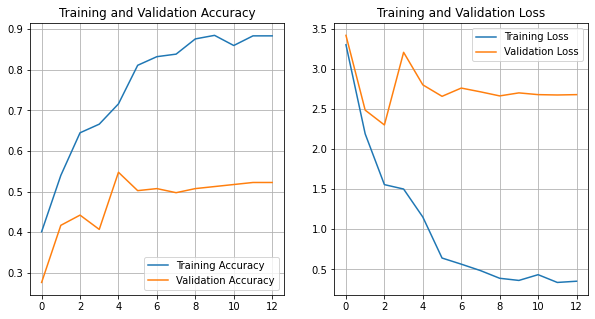

In [ ]:
plot_hist(history_mobnet)

InceptionV3

In [ ]:
conv_base = InceptionV3(include_top = False, weights = "imagenet", 
                               input_shape = (TARGET_SIZE, TARGET_SIZE, 3))
model_incept = tranfer_learning_create_model(conv_base)
model_incept.summary()

87924736/87910968 [==============================] - 2s 0us/step
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 rmalization)              

In [ ]:
epochs = 30
history_incept = model_incept.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[model_save, early_stop, reduce_lr],
  verbose=2
)

Epoch 1/30

Epoch 1: val_loss did not improve from 1.30035
100/100 - 18s - loss: 7.5855 - accuracy: 0.3375 - val_loss: 15.8992 - val_accuracy: 0.2462 - lr: 0.0100 - 18s/epoch - 181ms/step
Epoch 2/30

Epoch 2: val_loss did not improve from 1.30035
100/100 - 9s - loss: 4.6953 - accuracy: 0.4787 - val_loss: 7.9607 - val_accuracy: 0.3216 - lr: 0.0100 - 9s/epoch - 89ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 1.30035
100/100 - 9s - loss: 3.4791 - accuracy: 0.5325 - val_loss: 4.5490 - val_accuracy: 0.4573 - lr: 0.0100 - 9s/epoch - 87ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.30035
100/100 - 9s - loss: 2.8994 - accuracy: 0.5612 - val_loss: 3.7921 - val_accuracy: 0.4171 - lr: 0.0100 - 9s/epoch - 87ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.30035
100/100 - 9s - loss: 3.0164 - accuracy: 0.5800 - val_loss: 4.0639 - val_accuracy: 0.4322 - lr: 0.0100 - 9s/epoch - 86ms/step
Epoch 6/30

Epoch 6: val_loss did not improve from 1.30035
100/100 - 9s - lo

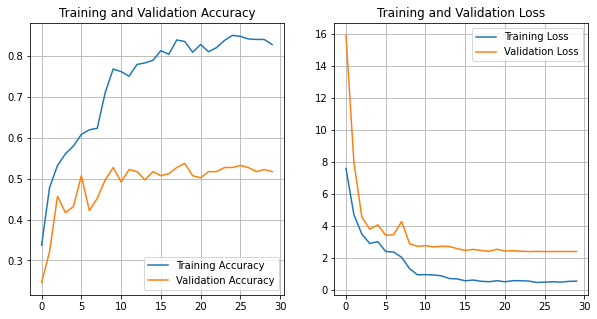

In [ ]:
plot_hist(history_incept)